<a href="https://colab.research.google.com/github/hitesh-lalwanii/Airline-Passenger-Referral-Prediction-/blob/main/copy_of_sample_ml_submission_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Airline Passenger Referral Prediction




##### **Project Type**    - Classification
##### **Contribution**    - Individual ( Hitesh Lalwani )






# **Project Summary -**

This project analyzes airline reviews from 2006 to 2019 to predict if passengers will recommend the airline. The dataset includes structured responses and free-text comments. The goal is to combine Exploratory Data Analysis (EDA) and Machine Learning (ML) classification to achieve accurate predictions.

# **GitHub Link -**

https://github.com/hitesh-lalwanii/Airline-Passenger-Referral-Prediction-

# **Problem Statement**


### Problem Statement

The goal of this project is to predict whether a passenger would recommend an airline based on various factors such as overall rating, traveler type, cabin service, food and beverage quality, ground service, and value for money. Using a dataset of airline reviews from 2006 to 2019, we aim to build a machine learning model that accurately identifies key determinants of customer satisfaction and provides actionable insights for improving airline services.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel("/content/drive/MyDrive/data_airline_reviews.xlsx")
data.head(5)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [13]:
# Dataset Rows & Columns count
data.shape

(131895, 17)

### Dataset Information

In [14]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
data.duplicated().sum()

70711

#### Missing Values/Null Values

In [16]:
# Missing Values/Null Values Count
df=data.isna().sum()
df

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

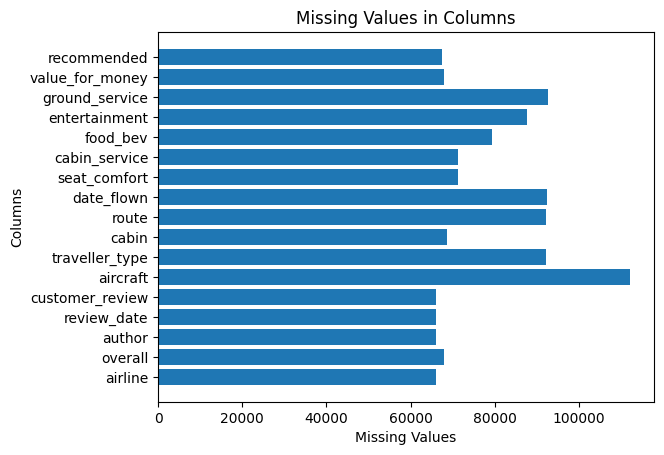

In [17]:
# Visualizing the missing values
x=df.index
y=df.values
plt.barh(x,y)
plt.xlabel("Missing Values")
plt.ylabel("Columns")
plt.title("Missing Values in Columns")
plt.show()

## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
data.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [18]:
# Dataset Describe
data.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

airline: Name of the airline (Categorical).
overall: Overall rating (1-10).
author: Reviewer identifier (Categorical).
reviewdate: Review date (YYYY-MM-DD).
aircraft: Type of aircraft (Categorical).
flight date: Flight date (YYYY-MM-DD).
traveller type: Type of traveler (Categorical).
cabin service: Cabin service rating (1-10).
food bev: Food and beverage rating (1-10).
ground service: Ground service rating (1-10).
value for money: Value for money rating (1-10).
recommended: Recommendation status (Yes/No).

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
data.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
# Write your code to make your dataset analysis ready.
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13189 entries, 7 to 131712
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          13189 non-null  object 
 1   overall          13189 non-null  float64
 2   author           13189 non-null  object 
 3   review_date      13189 non-null  object 
 4   customer_review  13189 non-null  object 
 5   aircraft         13189 non-null  object 
 6   traveller_type   13189 non-null  object 
 7   cabin            13189 non-null  object 
 8   route            13189 non-null  object 
 9   date_flown       13189 non-null  object 
 10  seat_comfort     13189 non-null  float64
 11  cabin_service    13189 non-null  float64
 12  food_bev         13189 non-null  float64
 13  entertainment    13189 non-null  float64
 14  ground_service   13189 non-null  float64
 15  value_for_money  13189 non-null  float64
 16  recommended      13189 non-null  object 
dtypes: float64(7), o

In [5]:
data=data.drop(['airline','author','review_date','route','date_flown','customer_review'],axis = 1)
data.head()


,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,A330,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,2.0,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,6.0,A320 / Boeing 737,Solo Leisure,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,1.0,A320 / A330,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,2.0,Boeing 777-300,Solo Leisure,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no


<Axes: >

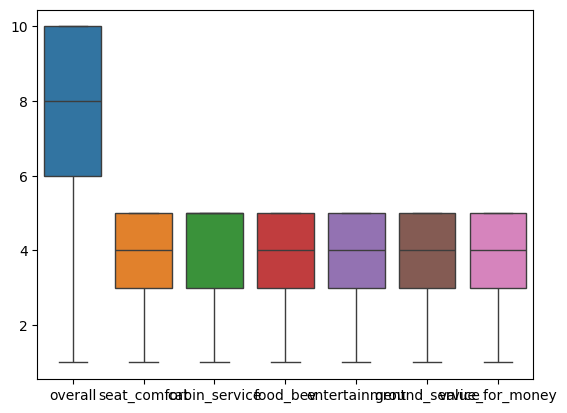

In [25]:
sns.boxplot(data=data)

WE have found that there are no outliers. So we don't need to treat any outliers.

### What all manipulations have you done and insights you found?

I have performed the following data manipulations:

Dropped null values.
Removed duplicate values.
Removed unnecessary columns.
Checked for outliers and found none.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Top 6 most frequently used Aircraft

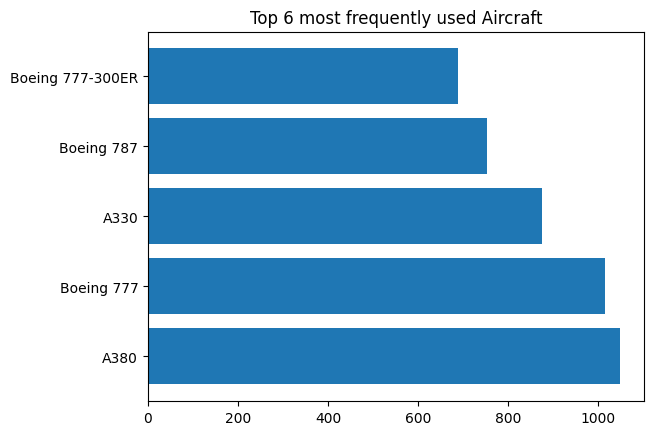

In [22]:
# Chart - 1 Top 6 most frequently used Aircraft
df=data["aircraft"].value_counts()
df=df.sort_values(ascending=False)
df=df.head(5)
x=df.index.astype(str)
y=df.values
plt.barh(x,y)
plt.title("Top 6 most frequently used Aircraft")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar horizontal chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that A380 Aircraft is most frequently used Aircraft among all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As A380 Aircraft is most frequently used Company can try to give more good service, entertainment quality, food quality as maximum as possible.

#### Chart - 2 Traveller Type Count

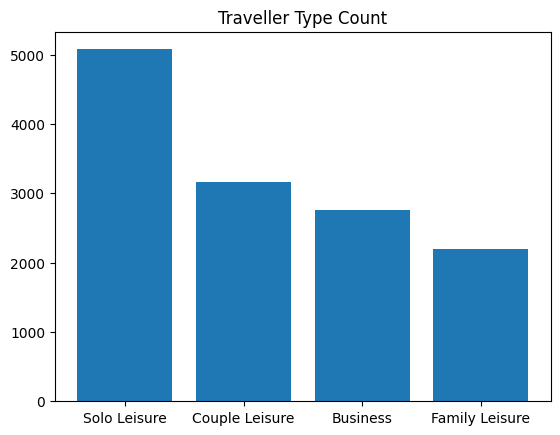

In [23]:
# Chart - 2 visualization code
df=data["traveller_type"].value_counts()
x=df.index.astype(str)
y=df.values
plt.bar(x,y)
plt.title("Traveller Type Count")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that Solo Travellers  are more likely to travel through Aircraft among all.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Company should give more benefits to Solo Travellers so they can come often this will lead to more business to Airline Company.

#### Chart - 3 Cabin Count


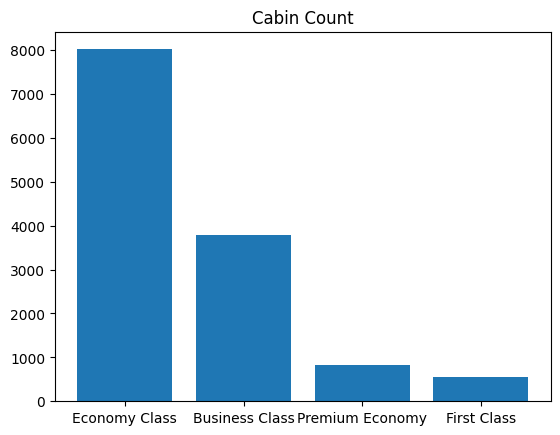

In [24]:
# Chart - 3 visualization code
df=data["cabin"].value_counts()
x=df.index.astype(str)
y=df.values
plt.bar(x,y)
plt.title("Cabin Count")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Bar chart because I need to compare the values of different categories.

##### 2. What is/are the insight(s) found from the chart?

Here I have found that  Travellers preffer Economy Class More as compared to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the cabin count chart help improve customer satisfaction, target marketing effectively, and allocate resources efficiently.

#### Chart - 4 Cabin V/S Overall Rating

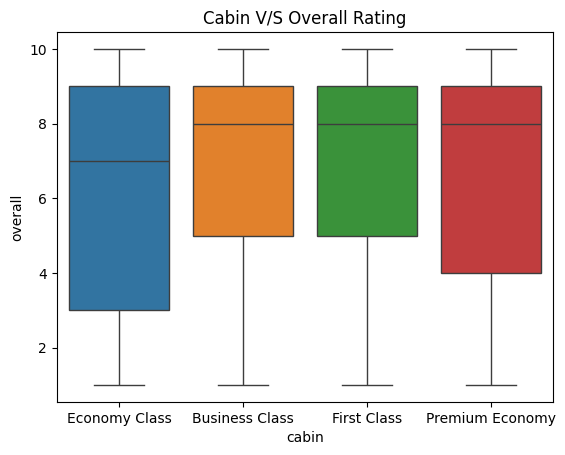

In [25]:
# Chart - 4 visualization code
sns.boxplot(data=data,x="cabin",y="overall",hue="cabin")
plt.title("Cabin V/S Overall Rating")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average overall ratings of each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average Overall Rating in Business Class,First Class  and Premium Economy are  much more higher than economy Classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact: Higher average ratings in Business, First Class, and Premium Economy can be leveraged for marketing and improving services to attract more high-paying customers.

Negative Growth Insight: Lower ratings in Economy Class indicate potential customer dissatisfaction, which could reduce bookings and negatively impact revenue. Addressing these issues is essential to prevent negative growth.







#### Chart - 5  Seat Comfort in each cabin

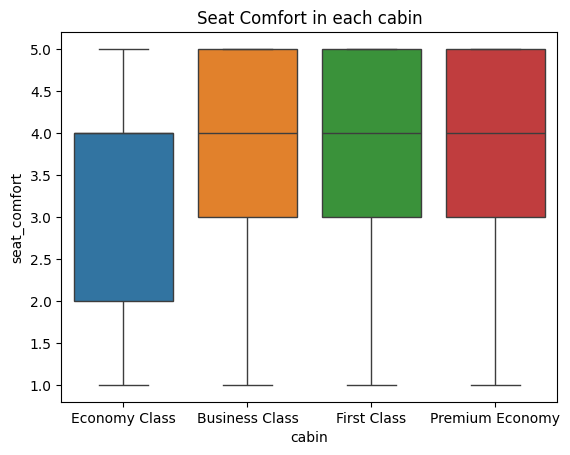

In [26]:
# Chart - 5 visualization code
sns.boxplot(data=data,x="cabin",y="seat_comfort",hue="cabin")
plt.title("Seat Comfort in each cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average seat comfort ratings of each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average seat comfort Rating in First Class, Business Class and Premium Economy are almost same and much more higher than Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights show high seat comfort ratings in premium classes, guiding investments to maintain or enhance comfort in these classes and improving Economy Class comfort to boost overall customer satisfaction.Neglecting Economy Class improvements due to lower ratings can lead to customer dissatisfaction and loss of budget-conscious travelers, negatively impacting growth.







#### Chart - 6 Cabin V/S Cabin Service

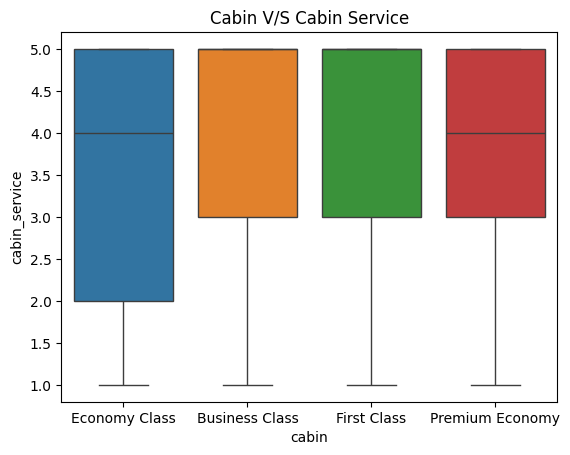

In [7]:
# Chart - 6 visualization code
sns.boxplot(data=data,x="cabin",y="cabin_service",hue="cabin")
plt.title("Cabin V/S Cabin Service")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average rationgs of cabin service in each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average cabin service rating is almost similar in each cabin.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistent cabin service ratings across all classes suggest a uniformly good service standard, which can enhance overall customer satisfaction.If service ratings are uniformly low, it indicates a need for improvement across all classes to avoid customer dissatisfaction and potential negative impact on growth.

#### Chart - 7 Food Bev In Each Cabin

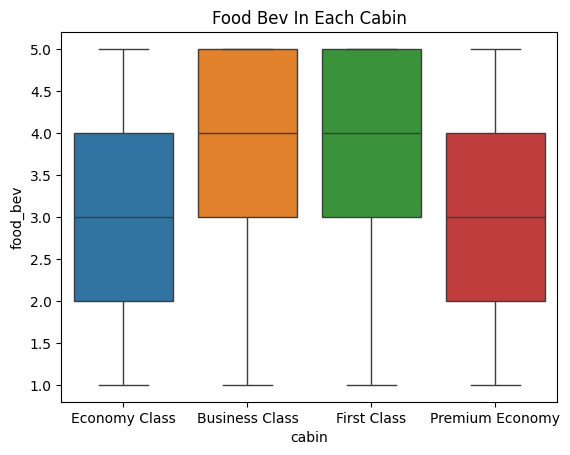

In [ ]:
# Chart - 7 visualization code
sns.boxplot(data=data,x="cabin",y="food_bev",hue="cabin")
plt.title("Food Bev In Each Cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average ratings of Food in each cabin

##### 2. What is/are the insight(s) found from the chart?



```

```

I found that Average foood Rating in First Class and Business Class are higher than Economy Class and Premium Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Higher food ratings in First and Business Class highlight strengths in premium services, guiding improvements in Economy and Premium Economy to enhance overall customer satisfaction.Lower food ratings in Economy and Premium Economy could lead to dissatisfaction among budget-conscious travelers, potentially impacting customer retention and growth.

#### Chart - 8 Entertainment in each cabin

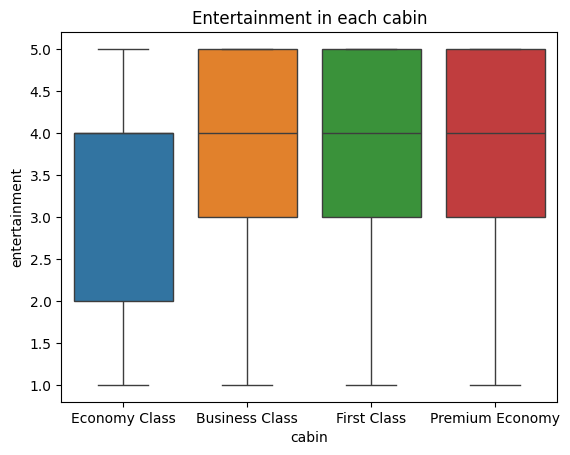

In [ ]:
# Chart - 8 visualization code
sns.boxplot(data=data,x="cabin",y="entertainment",hue="cabin")
plt.title("Entertainment in each cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average entertainment ratings in each cabin

##### 2. What is/are the insight(s) found from the chart?

I found that Average entertainment Rating in First Class, Business Class and Premium Economy are almost same and much more higher than Economy Class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High entertainment ratings across premium classes indicate consistent service quality, guiding investments to maintain this standard and potentially attract more customers to premium services.Lower entertainment ratings in Economy Class may lead to dissatisfaction among passengers, affecting customer retention and potentially hindering growth. Investing in improving Economy Class entertainment could mitigate this risk.

#### Chart - 9 Ground Service in each Cabin

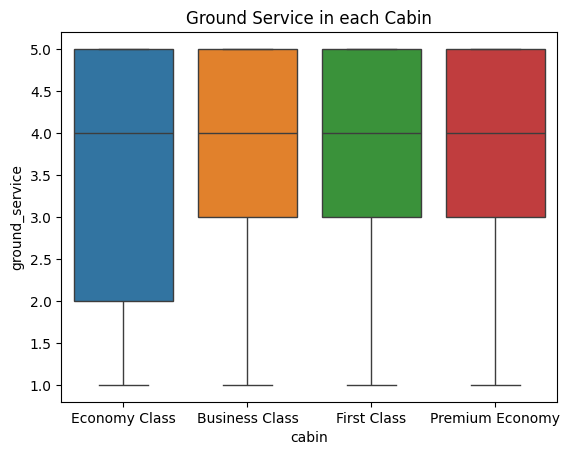

In [ ]:
# Chart - 9 visualization code
sns.boxplot(data=data,x="cabin",y="ground_service",hue="cabin")
plt.title("Ground Service in each Cabin")
plt.show()

##### 1. Why did you pick the specific chart?

Here I have used Boxplot because I need to define average ground service ratings in each cabin






##### 2. What is/are the insight(s) found from the chart?

I found that Average ground service Rating in all class are almost same. But some of the travellers gave lower ground service rating in economy class.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Consistently high ground service ratings across classes indicate a strong service standard, which can contribute to overall customer satisfaction and loyalty. Lower ground service ratings from some Economy Class travelers suggest a need for targeted improvements in ground services for this segment to prevent potential dissatisfaction and negative impact on growth.







#### Chart - 10 - Correlation Heatmap

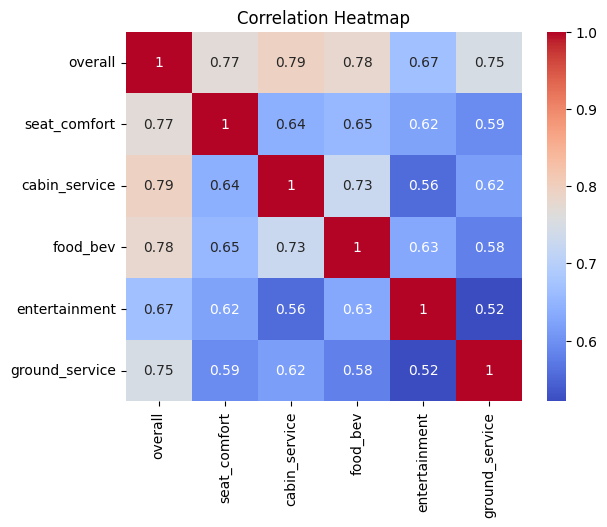

In [ ]:
# Correlation Heatmap visualization code
continous_col=["overall","seat_comfort","cabin_service","food_bev","entertainment","ground_service"]
data_continous = data[continous_col]
corr_matrix = data_continous.corr()
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

 I have choosen Heatmap chart because I need to find the co relation between 2 or more continous variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis -: Economy class travelers are less likely to recommend the airline compared to First Class or Business Class travelers.
Alternate Hypothesis -: Economy class travelers are more likely to recommend the airline compared to First Class or Business Class travelers.

#### 2. Perform an appropriate statistical test.

In [27]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['cabin'], data['recommended'])
chi2, p, dof, expected = chi2_contingency(contingency_table)



print(f"P-value: {p}")


P-value: 1.6264886638893759e-21


WE have taken the level of confidence as 95% and level of significance as 5%. If pvalue is >0.05 we failed to reject null hypothesis and if p value <=0.05 we reject the null hypothesis

So in this case p value > 0.05 so we failed reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I used the Chi-Square test (chi2_contingency) to calculate the p-value.

##### Why did you choose the specific statistical test?

I chose the Chi-Square test because it is suitable for testing the independence between categorical variables, such as the cabin class and recommendation status in this case.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis -: Seats are more comfortable in First , business and premium economy class.

Alternate Hypothesis -: Seats are more comfortable in economy class as compared to all other 3 classes.

#### 2. Perform an appropriate statistical test.

In [28]:
# Perform Statistical Test to obtain P-Value
contingency_table=pd.crosstab(data['cabin'],data["seat_comfort"])
ch2_test=chi2_contingency(contingency_table)

p_value=ch2_test[1]
print(p_value)

1.5358840925821064e-115


WE have taken the level of confidence as 95% and level of significance as 5%. If pvalue is >0.05 we failed to reject null hypothesis and if p value <=0.05 we reject the null hypothesis. So in this case p value >0.05 so we failed to reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

I used the Chi-Square test (chi2_contingency) to calculate the p-value


##### Why did you choose the specific statistical test?

I chose the Chi-Square test because it is suitable for testing the independence between categorical variables, such as the cabin class and seat comfortable in this case.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis -: Passengers traveling for business purposes report higher 'seat_comfort' and 'value_for_money' ratings compared to leisure travelers.

Alternate Hypothesis -: Passengers traveling for business purposes report lower 'seat_comfort' and 'value_for_money' ratings compared to leisure travelers.

#### 2. Perform an appropriate statistical test.

<ipython-input-6-3d6e5c05380a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  business_data['Traveler Type'] = 'Business'
<ipython-input-6-3d6e5c05380a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leisure_data['Traveler Type'] = 'Leisure'


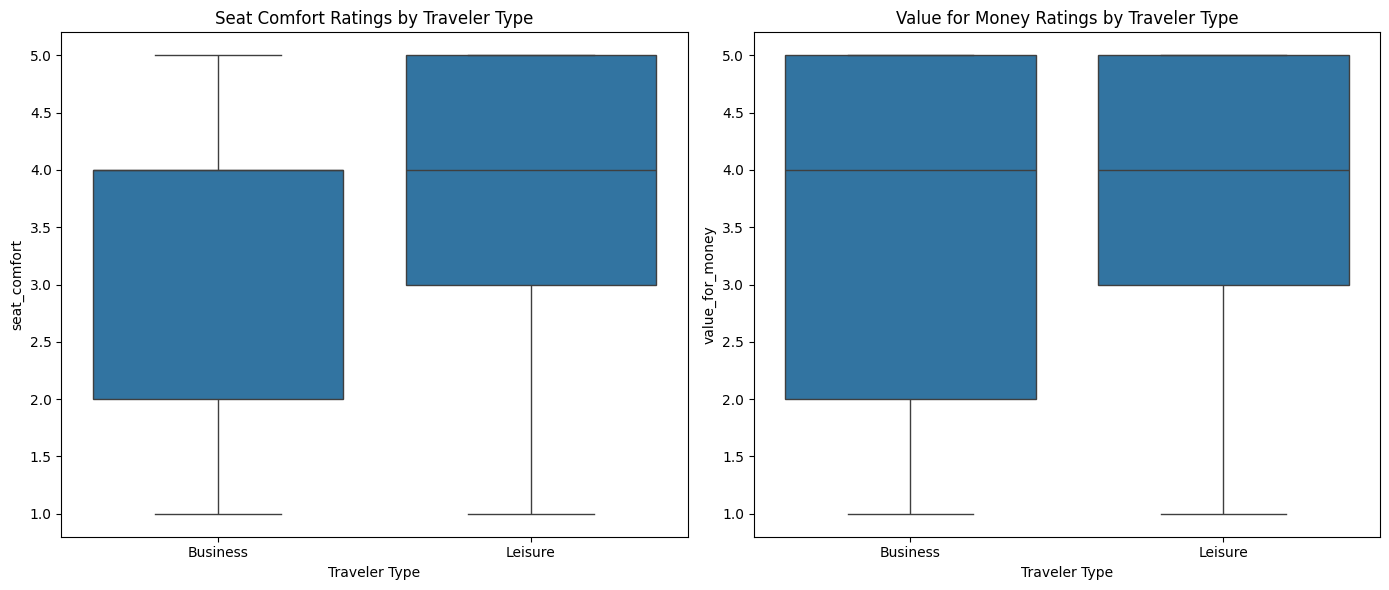

In [6]:
business_data = data[data['traveller_type'] == 'Business']
leisure_data = data[data['traveller_type'] == 'Solo Leisure']

business_data['Traveler Type'] = 'Business'
leisure_data['Traveler Type'] = 'Leisure'

combined_data = pd.concat([business_data, leisure_data])

plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.boxplot(x='Traveler Type', y='seat_comfort', data=combined_data)
plt.title('Seat Comfort Ratings by Traveler Type')


plt.subplot(1, 2, 2)
sns.boxplot(x='Traveler Type', y='value_for_money', data=combined_data)
plt.title('Value for Money Ratings by Traveler Type')


plt.tight_layout()

plt.show()


##### Which statistical test have you done to obtain P-Value?

I have drawn box plot to compare the on an average values between different travellers type.

Since the Solo Traveller has more average seat comfort ratings as compared to business traveller and the value for money rating for travllers are almost equal. This means there's not enough evidence to conclude that business travelers report higher ratings compared to leisure travelers. So we will reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose box plots to visually compare the distributions of 'seat_comfort' and 'value_for_money' ratings between business and leisure travelers. Box plots are effective for identifying differences in median, quartiles, and variability in data distributions across groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Categorical Encoding

In [6]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["traveller_type"]=le.fit_transform(data["traveller_type"])
data

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,A330,3,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,2.0,Boeing 737-800 / A330-300,3,Economy Class,3.0,3.0,2.0,3.0,1.0,2.0,no
17,6.0,A320 / Boeing 737,3,Economy Class,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,1.0,A320 / A330,3,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
29,2.0,Boeing 777-300,3,Economy Class,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
131676,6.0,Boeing 767,3,Economy Class,2.0,4.0,2.0,1.0,4.0,5.0,yes
131680,7.0,Boeing 767,1,Economy Class,2.0,2.0,2.0,1.0,2.0,5.0,yes
131696,1.0,Boeing,2,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no
131702,10.0,Boeing 737,1,Economy Class,5.0,5.0,5.0,4.0,4.0,4.0,yes


#### What all categorical encoding techniques have you used & why did you use those techniques?

Here I HAVE USED Label Encoding in which machine automatically labels the category.

In [7]:
data["cabin"]=data["cabin"].map({"Economy Class":4,"Premium Economy":3,"Business Class":2,"First Class":1})
data

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,A330,3,4,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,2.0,Boeing 737-800 / A330-300,3,4,3.0,3.0,2.0,3.0,1.0,2.0,no
17,6.0,A320 / Boeing 737,3,4,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,1.0,A320 / A330,3,4,1.0,1.0,1.0,1.0,1.0,1.0,no
29,2.0,Boeing 777-300,3,4,1.0,3.0,2.0,2.0,1.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...
131676,6.0,Boeing 767,3,4,2.0,4.0,2.0,1.0,4.0,5.0,yes
131680,7.0,Boeing 767,1,4,2.0,2.0,2.0,1.0,2.0,5.0,yes
131696,1.0,Boeing,2,4,1.0,1.0,1.0,1.0,1.0,1.0,no
131702,10.0,Boeing 737,1,4,5.0,5.0,5.0,4.0,4.0,4.0,yes


Here I have used Ordinal Encoding because I need to mention the priority of each categories.

In [8]:
print(data['recommended'].unique())


['yes' 'no']


In [9]:
data['recommended'] = data['recommended'].str.lower().str.strip()


In [10]:
data['recommended'] = data['recommended'].map({'yes': 1, 'no': 0})
data

,overall,aircraft,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,A330,3,4,4.0,5.0,5.0,5.0,5.0,5.0,1
15,2.0,Boeing 737-800 / A330-300,3,4,3.0,3.0,2.0,3.0,1.0,2.0,0
17,6.0,A320 / Boeing 737,3,4,2.0,3.0,3.0,3.0,3.0,3.0,1
19,1.0,A320 / A330,3,4,1.0,1.0,1.0,1.0,1.0,1.0,0
29,2.0,Boeing 777-300,3,4,1.0,3.0,2.0,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
131676,6.0,Boeing 767,3,4,2.0,4.0,2.0,1.0,4.0,5.0,1
131680,7.0,Boeing 767,1,4,2.0,2.0,2.0,1.0,2.0,5.0,1
131696,1.0,Boeing,2,4,1.0,1.0,1.0,1.0,1.0,1.0,0
131702,10.0,Boeing 737,1,4,5.0,5.0,5.0,4.0,4.0,4.0,1


**Now Removing the unneccessary column again**

In [11]:
data.drop(["aircraft"],axis=1,inplace=True)
data

,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,10.0,3,4,4.0,5.0,5.0,5.0,5.0,5.0,1
15,2.0,3,4,3.0,3.0,2.0,3.0,1.0,2.0,0
17,6.0,3,4,2.0,3.0,3.0,3.0,3.0,3.0,1
19,1.0,3,4,1.0,1.0,1.0,1.0,1.0,1.0,0
29,2.0,3,4,1.0,3.0,2.0,2.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
131676,6.0,3,4,2.0,4.0,2.0,1.0,4.0,5.0,1
131680,7.0,1,4,2.0,2.0,2.0,1.0,2.0,5.0,1
131696,1.0,2,4,1.0,1.0,1.0,1.0,1.0,1.0,0
131702,10.0,1,4,5.0,5.0,5.0,4.0,4.0,4.0,1


### 2. Feature Selection

####  Feature Selection

In [96]:
# Select your features wisely to avoid overfitting
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(data):
  vif_data=pd.DataFrame() # here we have created a empty dataframe
  vif_data["features"]=data.columns
  vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
  return vif_data

vif=vif_calc(data)
print(vif)

          features        VIF
0          overall  50.816921
1   traveller_type   3.324248
2            cabin   6.724255
3     seat_comfort  19.499600
4    cabin_service  22.215126
5         food_bev  19.154387
6    entertainment  13.335612
7   ground_service  15.420146
8  value_for_money  31.414970
9      recommended  11.568280


##### What all feature selection methods have you used  and why?

We have used variance inflation factor here to find out which which feature we need to choose which to drop.

##### Which all features you found important and why?

We found that 2 features Overall and Value for money are getting very vif so I decided to drop both the features.

Features which are important -: traveller_type,cabin,seat_comfort,cabin_service,
food_bev,
entertainment,
ground_service,
recommended.   
 They all suggest low multi collinearity as compared to those two



In [97]:
data.drop(["overall","value_for_money"],axis=1,inplace=True)
data

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended
7,3,4,4.0,5.0,5.0,5.0,5.0,1
15,3,4,3.0,3.0,2.0,3.0,1.0,0
17,3,4,2.0,3.0,3.0,3.0,3.0,1
19,3,4,1.0,1.0,1.0,1.0,1.0,0
29,3,4,1.0,3.0,2.0,2.0,1.0,0
...,...,...,...,...,...,...,...,...
131676,3,4,2.0,4.0,2.0,1.0,4.0,1
131680,1,4,2.0,2.0,2.0,1.0,2.0,1
131696,2,4,1.0,1.0,1.0,1.0,1.0,0
131702,1,4,5.0,5.0,5.0,4.0,4.0,1


### 3. Data Splitting

In [13]:
# Split your data to train and test. Choose Splitting ratio wisely.
x=data[["traveller_type","cabin","seat_comfort","cabin_service","food_bev","entertainment","ground_service"]]
y=data["recommended"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(10551, 7)
(2638, 7)
(10551,)
(2638,)


##### What data splitting ratio have you used and why?

The Splitting Ratio was 80% training data and 20% testing data. I have choosed 80:20 ratio(rather than 70:30) because I want model to train on more dataset so that it can produce more accurate results.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression


In [14]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# Fit the Algorithm
model.fit(x_train,y_train)

# Predict on the model
y_pred=model.predict(x_test)

In [16]:
model.intercept_

array([-10.38103052])

In [18]:
model.coef_

array([[0.10093837, 0.27263333, 0.77866024, 0.71337514, 0.62735513,
        0.25823008, 0.74653653]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [15]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9154662623199393


So here the problem is binary classification. So in this case I choosed Logistic Regression as algorithm and with the help of accuracy score matric I found that model if giving 91% accurate results.

[[ 745  131]
 [  92 1670]]


<Axes: >

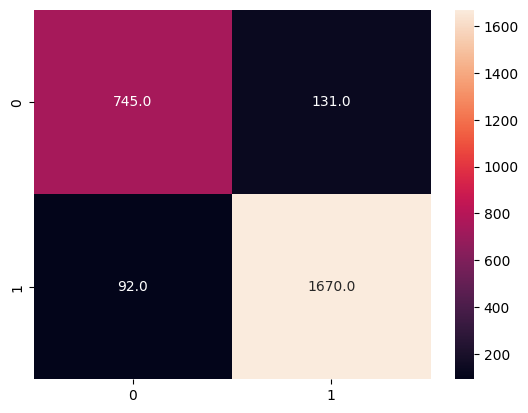

In [22]:
con=confusion_matrix(y_test,y_pred)
print(con)
sns.heatmap(con, annot=True, fmt = ".1f")

#### 2. Cross- Validation & Hyperparameter Tuning

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
score=cross_val_score(model,x_train,y_train,cv=5)
print("Cross Validation Accuracy Score : ",score)

Cross Validation Accuracy Score :  [0.90573188 0.91706161 0.90521327 0.91516588 0.91184834]


In [24]:
print("Cross Validation Accuracy Mean : ",score.mean())

Cross Validation Accuracy Mean :  0.9110041960302725


### ML Model - 2 Random Forest ALgorithm


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [28]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9056103108415466


**90% accuracy with Random Forest **

#### 2. Cross- Validation & Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
rf_gscv=GridSearchCV(estimator=model,param_grid=parameters,cv=5)
rf_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]})

In [33]:
rf_gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [34]:
best_model=rf_gscv.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [35]:
y_pred_best_model=best_model.predict(x_test)
new_acc=accuracy_score(y_test,y_pred_best_model)
new_acc

0.9150871872630781

**Now after getting best Hyperparameters and after applying it we found the increase in accuracy score. Now the accuracy is 91%**

# **Conclusion**

The Models used for this Classsification problem are



1.   Logistic Regression Model
2.   Random Forest Model



*   We performed Hyperparameter tuning using Gridsearch CV method for Random Forest Algorithm. To increase accuracy and avoid Overfitting Criteria, this is done.



*   We have found that Logistic Regression model gave 91% accuracy.


*   And Random Forest Algorithm initially gave 90% accuracy after applying hyperparamter tunning we have found the best random forest model with the accuracy of 91%.




*   The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

  

* As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort.












### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***